<a href="https://colab.research.google.com/github/Vixuz144/Simulaci-n-2/blob/main/Problema_de_la_ruina_del_jugador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problema de la ruina del jugador

Tenemos dos personas que deciden pasar su tiempo jugando con una moneda. Un jugador elige sol y el otro se queda con el ágila. Cada vez que salga un sol, el primer jugador gana, por lo que el segundo jugador le da una moneda. Sin embargo, si sale águila el primer jugador le da una moneda al segundo.

Si consideramos que la moneda no esta equilibrada, así como la cantidad de dinero inicial con el que participa cada jugador podremos obtener resultados diversos.



## Caso Normal

Para ello, primero vamos a considerar la situación en que el primer jugador comienza con 2 monedas y el segundo jugador con 3. Además, la probabilidad dde que el jugador 1 gane es del 30% (p = 0.3).

La celda a continuación agrega las librerias que se usarán para el desarrollo del código.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import random
from numba import jit
import pandas as pd

Función que simula el juego ya antes descrito.

In [2]:
@jit(nopython = True) #Jit para que séa un poco más rápido (Puede no funcionar bien con todas las librerias)
#Se les da un valor a cada entrada de la fución para establecerlo por defecto.
def ruina(m1 = 2, m2 = 3, p = 0.5, g = False):
  c1, c2 = m1, m2
  n = 0
  while c1 != 0 and c2 != 0:
    r = random()
    n += 1
    if r <= p: #Gana el jugador 1
      c1 += 1
      c2 -= 1
    else: #Gana el jugador 2
      c1 -= 1
      c2 += 1
  return c1, c2, n

A continuación se presenta el código  con el que se repite el juego n veces (bocle).

In [3]:
@jit(nopython = True)
def repeticion(rep = 10**4, m1 = 2, m2 = 3, p = 0.5):
  l = [] # lista de promedios de perdidas
  g = [] # lista de Ganancias
  d = [] # lista de duraciones del juego
  c = 0
  for i in range(rep):
    a, b, dur = ruina(m1, m2, p)
    g.append(a-m1)
    d.append(dur)
    if a == 0:
      c += 1
      l.append(c/(i+1))
  return l, g, d

In [4]:
p, g, dur = repeticion(10**6, p = 0.3)
print(f'La probabilidad de que el jugador 1 pierda (ruina): {np.mean(p)}')
print(f"La ganancia media del jugador 1: {np.mean(g)}")
print(f"Duración esperada del juego: {np.mean(dur)}")

La probabilidad de que el jugador 1 pierda (ruina): 0.9345819118943036
La ganancia media del jugador 1: -1.67216
Duración esperada del juego: 4.186044


Ahora, para ilustrar un poco mejor este juego en las condiciones ya antes planteadas, se presenta a continuación un código que graficará la "caminata" o progreso del dinero del jugador 1

In [5]:
@jit(nopython = True)
def graf(m1 = 2, m2 = 3, p = 0.5):
  c1, c2 = m1, m2
  n = 0
  lx, ly = [n], [c1]
  while c1 != 0 and c2 != 0:
    r = random()
    n += 1
    if r <= p:
      c1 += 1
      c2 -= 1
    else:
      c1 -= 1
      c2 += 1
    lx.append(n)
    ly.append(c1)
  return lx,ly

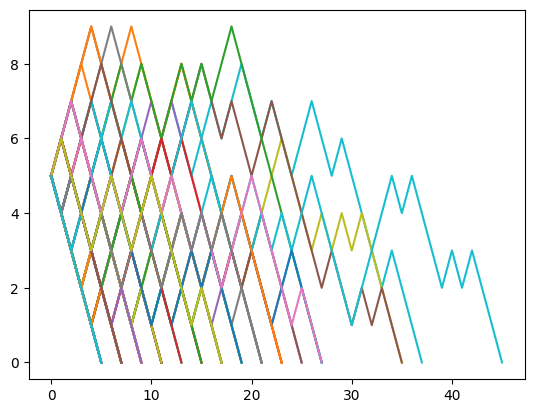

In [6]:
for i in range(100):
  x, y = graf(m1 = 5, m2 = 10, p = 0.3)
  plt.plot(x,y)
plt.show()

Ahora, vamos a ver como afecta si la moneda es legal (equilibrada) o no. Para esto vamos a variar la probabilidad de que gane el jugador 1.

In [7]:
pes = np.arange(0.05,1,0.05)
qes = 1-pes

m1 = 2
m2 = 3

m = len(pes)

nr = 10**6
r, g, d = [], [], []
for p in pes:
  a, b, c = repeticion(nr, m1, m2, p)
  r.append(np.mean(a))
  g.append(np.mean(b))
  d.append(np.mean(c))


tabla = pd.DataFrame({'p':pes, 'q':qes, 'm1':m1*np.ones(m), 'm2':m2*np.ones(m), 'p(ruina)':r, 'p(exito)': 1 - np.array(r), 'ganancia media':g, 'duración media':d})

print(tabla)

       p     q   m1   m2  p(ruina)  p(exito)  ganancia media  duración media
0   0.05  0.95  2.0  3.0  0.999866  0.000134       -1.999340        2.221776
1   0.10  0.90  2.0  3.0  0.998706  0.001294       -1.993560        2.492050
2   0.15  0.85  2.0  3.0  0.994677  0.005323       -1.973575        2.819469
3   0.20  0.80  2.0  3.0  0.985316  0.014684       -1.926275        3.207637
4   0.25  0.75  2.0  3.0  0.966735  0.033265       -1.834860        3.669810
5   0.30  0.70  2.0  3.0  0.934731  0.065269       -1.673460        4.184536
6   0.35  0.65  2.0  3.0  0.884162  0.115838       -1.420600        4.731358
7   0.40  0.60  2.0  3.0  0.810399  0.189601       -1.052775        5.261353
8   0.45  0.55  2.0  3.0  0.715552  0.284448       -0.576015        5.703431
9   0.50  0.50  2.0  3.0  0.599762  0.400238        0.001500        5.995746
10  0.55  0.45  2.0  3.0  0.477766  0.522234        0.609755        6.096821
11  0.60  0.40  2.0  3.0  0.359695  0.640305        1.199855        5.995925

##Juego contra un rico

Ahora, se va a analizar el mismo juego, pero el segundo jugador es rico y decide jugar con "dinero infinito". Esta condición lo que nos quiere decir es que aunque pierda y le de una moneda al jugador 1, nunca se quedará sin monedas para seguir jugando.

Por lo que para este caso se puede reducir el problema al analizar la situación del jugador 1.

In [8]:
@jit(nopython = True)
def ruina_v2(m = 2, p = 0.5):
  c = m
  n = 0
  while c != 0:
    r = random()
    n += 1
    if r <= p:
      c += 1
    else:
      c -= 1
  return c, n

In [9]:
@jit(nopython = True)
def rep(n = 10**4, m = 2, p = 0.5):
  l = []
  g = []
  d = []
  c = 0
  for i in range(n):
    a, dur = ruina_v2(m, p)
    g.append(a-m)
    d.append(dur)
    if a == 0:
      c += 1
      l.append(c/(i+1))
  return l, g, d

In [10]:
p, g, d = rep(10**8, p = 0.3)
print(f'La probabilidad de que el jugador 1 pierda (ruina): {np.mean(p)}')
print(f"La ganancia media del jugador 1: {np.mean(g)}")
print(f"Duración esperada del juego: {np.mean(d)}")

La probabilidad de que el jugador 1 pierda (ruina): 1.0
La ganancia media del jugador 1: -2.0
Duración esperada del juego: 4.9997035


A continuación se presenta una gráfica para visualizar el desarrollo de varios juegos.

In [11]:
@jit(nopython = True)
def graf_v2(m = 2, p = 0.5):
  c = m
  n = 0
  lx, ly = [n], [c]
  while c != 0:
    r = random()
    n += 1
    if r <= p:
      c += 1
    else:
      c -= 1
    lx.append(n)
    ly.append(c)
  return lx,ly

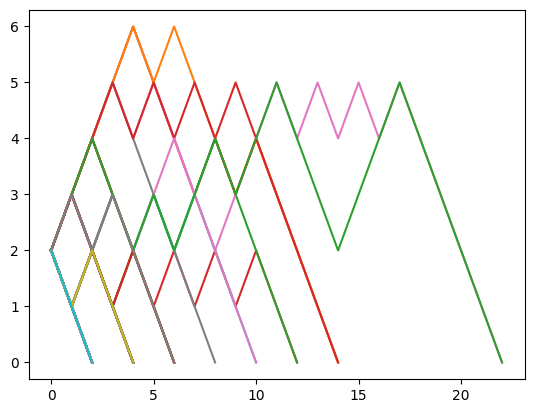

In [12]:
for i in range(100):
  x, y = graf_v2(m = 2, p = 0.3)
  plt.plot(x,y)
plt.show()

Finalmente se desarrolla una tabla sdonde se muestra como varian los resultados según la probabilidad de que gane el jugador 1.

In [13]:
pes = np.arange(0.05,0.5,0.05)
qes = 1-pes

m = 2

nr = 10**6
r, g, d = [], [], []
for p in pes:
  a, b, c = rep(nr, m, p)
  r.append(np.mean(a))
  g.append(np.mean(b))
  d.append(np.mean(c))


tabla = pd.DataFrame({'p':pes, 'q':qes, 'm':m*np.ones(len(pes)), 'p(ruina)':r, 'p(exito)': 1 - np.array(r), 'ganancia media':g, 'duración media':d})

print(tabla)

      p     q    m  p(ruina)  p(exito)  ganancia media  duración media
0  0.05  0.95  2.0       1.0       0.0            -2.0        2.222444
1  0.10  0.90  2.0       1.0       0.0            -2.0        2.498234
2  0.15  0.85  2.0       1.0       0.0            -2.0        2.855884
3  0.20  0.80  2.0       1.0       0.0            -2.0        3.332176
4  0.25  0.75  2.0       1.0       0.0            -2.0        3.995898
5  0.30  0.70  2.0       1.0       0.0            -2.0        4.997228
6  0.35  0.65  2.0       1.0       0.0            -2.0        6.667988
7  0.40  0.60  2.0       1.0       0.0            -2.0        9.992336
8  0.45  0.55  2.0       1.0       0.0            -2.0       20.017384
